In [2]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from massart import addNoise2, ground_truth_permutations
from LabelRankers import *


d = 15  # data dimension
k = 15  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W_opt = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=5000)

R_train = ground_truth_permutations(X_train, W_opt)
P_train = np.argsort(R_train, axis=1)

# Test data
X_test = D.rvs(size=1000)

R_test = ground_truth_permutations(X_test, W_opt)
P_test = np.argsort(R_test, axis=1)

In [3]:
W_opt

array([[0.71884098, 0.06769359, 0.53109957, 0.9342198 , 0.15661389,
        0.03152564, 0.68175151, 0.79738295, 0.77557869, 0.93680774,
        0.88784759, 0.13254966, 0.36207226, 0.11644158, 0.76011322],
       [0.26877873, 0.55486168, 0.2912115 , 0.23194996, 0.83926563,
        0.81472081, 0.78406975, 0.92871288, 0.02051997, 0.59883225,
        0.03002739, 0.76130729, 0.9727027 , 0.38082209, 0.17476822],
       [0.04386308, 0.86933216, 0.24868477, 0.35595926, 0.89446896,
        0.81144013, 0.54542902, 0.18941671, 0.64024242, 0.01102611,
        0.41868964, 0.25900127, 0.26367786, 0.54173114, 0.80573759],
       [0.54301912, 0.395336  , 0.14785208, 0.35394468, 0.04286083,
        0.67667364, 0.18323465, 0.23140761, 0.68662862, 0.91538372,
        0.53692876, 0.92027414, 0.12378905, 0.65151765, 0.60775928],
       [0.9815494 , 0.36303098, 0.77500474, 0.15529216, 0.06242482,
        0.41341729, 0.31315886, 0.80284182, 0.25719163, 0.70355923,
        0.13389762, 0.13502954, 0.50376672, 

In [2]:
labelwiseDecisionTreeLRScores = []
labelwiseRandomForestLRScores = []
pairwiseDecisionTreeLRScores = []
pairwiseRandomForestLRScores = []
pairwiseHalfspaceLRScores = []

def scores(eta_max):
  R_train_noisy = np.array([addNoise2(y, eta_max) for y in R_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  labelwiseDecisionTreeLRScores.append(score(P_test, LabelwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  labelwiseRandomForestLRScores.append(score(P_test, LabelwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseDecisionTreeLRScores.append(score(P_test, PairwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseRandomForestLRScores.append(score(P_test, PairwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseHalfspaceLRScores.append(score(P_test, PairwiseHalfspaceLR(0.005, 0.1, 0.8).fit(X_train, P_train_noisy).predict(X_test)))

In [3]:
etas = np.arange(.2, .5, .05)
for eta_max in etas: scores(eta_max)

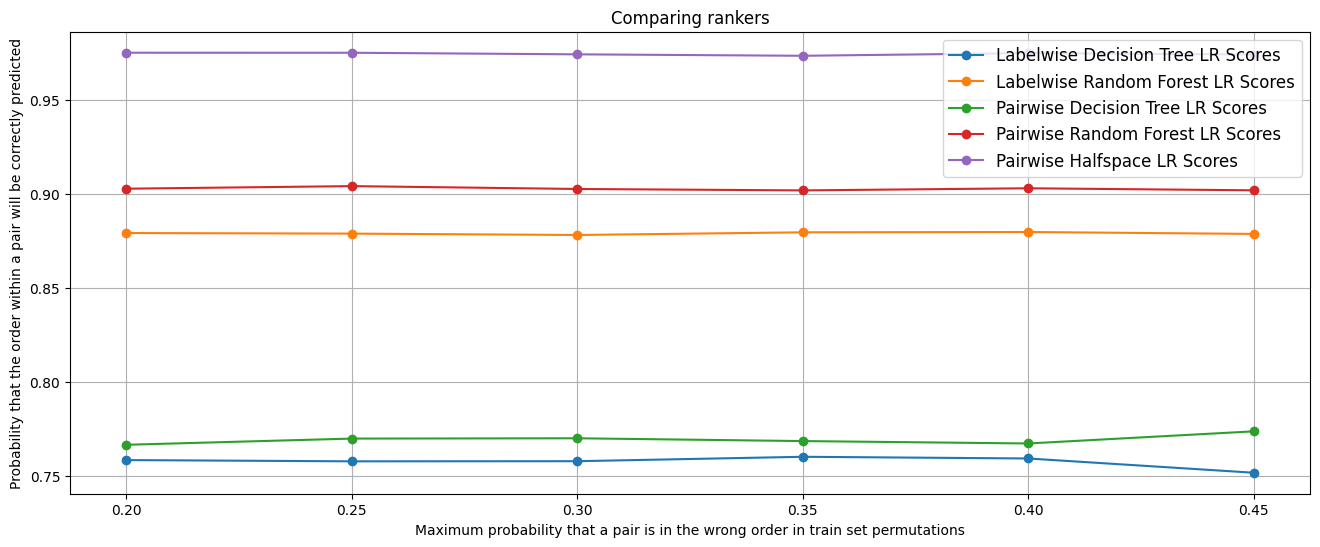

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.title('Comparing rankers')
plt.plot(etas, labelwiseDecisionTreeLRScores, '-o')
plt.plot(etas, labelwiseRandomForestLRScores, '-o')
plt.plot(etas, pairwiseDecisionTreeLRScores, '-o')
plt.plot(etas, pairwiseRandomForestLRScores, '-o')
plt.plot(etas, pairwiseHalfspaceLRScores, '-o')
plt.legend([
  'Labelwise Decision Tree LR Scores',
  'Labelwise Random Forest LR Scores',
  'Pairwise Decision Tree LR Scores',
  'Pairwise Random Forest LR Scores',
  'Pairwise Halfspace LR Scores'
  ], 
  fontsize=12
)
plt.xticks(etas)
plt.xlabel('Maximum probability that a pair is in the wrong order in train set permutations')
plt.ylabel('Probability that the order within a pair will be correctly predicted')
plt.grid()
plt.show()